<a href="https://colab.research.google.com/github/PragyaGupta2912/Digit-Detection/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
from keras.datasets import mnist

In [3]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(data)

2

In [5]:
(train_images, train_labels), (test_images, test_labels) = data

In [6]:
len(train_images)

60000

In [7]:
len(train_labels)

60000

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [9]:
train_images = train_images.astype('float')/255

In [10]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [11]:
test_images = test_images.astype('float')/255

In [12]:
train_labels[1]

0

In [13]:
from keras.preprocessing import image

In [14]:
import matplotlib.pyplot as plt

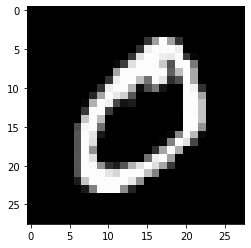

In [15]:
plt.imshow(image.array_to_img(train_images[1]), cmap="gray")

In [16]:
#0 -> [1, 0, 0, 0, 0, 0 , 0 , 0]
#1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

In [17]:
from keras.utils import to_categorical

In [18]:
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [19]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [21]:
from keras import layers, models

In [22]:
model = models.Sequential()

In [23]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(layers.MaxPooling2D((2,2)))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.add(layers.MaxPooling2D((2, 2)))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [32]:
model.add(layers.Flatten())

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [34]:
model.add(layers.Dense(64, activation='relu'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [36]:
model.add(layers.Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 37s 4ms/step - loss: 0.3928 - accuracy: 0.8734
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0495 - accuracy: 0.9838
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0187 - accuracy: 0.9945
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0103 - accuracy: 0.9971
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0075 - accuracy: 0.9975
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0058 - accuracy: 0.998

In [40]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9917


In [41]:
test_loss

0.038413360714912415

In [42]:
test_accuracy

0.9916999936103821

In [43]:
predictions = model.predict(test_images)
#import numpy as np
#predicted_classes = np.argmax(predictions, axis = 1)

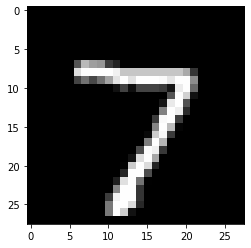

In [44]:
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [45]:
test_labels_original[0]

7

In [46]:
predictions[0]

array([8.7061746e-14, 2.2112821e-13, 1.3655385e-10, 3.5535591e-12,
       4.2948749e-11, 1.5540502e-15, 2.2094434e-21, 1.0000000e+00,
       1.5394894e-13, 1.0091330e-09], dtype=float32)

In [47]:
#predicted_classes[0]

In [48]:
test_images[0].shape

(28, 28, 1)

In [49]:
test_images.shape

(10000, 28, 28, 1)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4

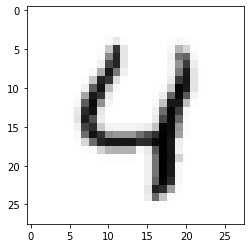

In [56]:
img = image.load_img(path="/content/digit.png",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1,28,28,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
prediction

In [54]:
prediction

4